In [1]:
################################################################################
# CSE 253: Programming Assignment 1
# Code snippet by Jenny Hamer
# Winter 2019
################################################################################
# We've provided you with the dataset in CAFE.tar.gz. To uncompress, use:
# tar -xzvf CAFE.tar.gz
################################################################################
# To install PIL, refer to the instructions for your system:
# https://pillow.readthedocs.io/en/5.2.x/installation.html
################################################################################
# If you don't have NumPy installed, please use the instructions here:
# https://scipy.org/install.html
################################################################################

from os import listdir
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The relative path to your CAFE-Gamma dataset
data_dir = "./CAFE/"

# Dictionary of semantic "label" to emotions
emotion_dict = {"h": "happy", "ht": "happy with teeth", "m": "maudlin",
                "s": "surprise", "f": "fear", "a": "anger", "d": "disgust", "n": "neutral"}


def load_data(data_dir="./CAFE/"):
    """ Load all PGM images stored in your data directory into a list of NumPy
    arrays with a list of corresponding labels.

    Args:
        data_dir: The relative filepath to the CAFE dataset.
    Returns:
        images: A list containing every image in CAFE as an array.
        labels: A list of the corresponding labels (filenames) for each image.
    """
    # Get the list of image file names
    all_files = listdir(data_dir)

    # Store the images as arrays and their labels in two lists
    images = []
    labels = []

    for file in all_files:
        # Load in the files as PIL images and convert to NumPy arrays
        if 'f' in file or 's' in file:
            img = Image.open(data_dir + file)
            images.append(np.array(img))
            labels.append(file)

    print("Total number of images:", len(images), "and labels:", len(labels))

    return images, labels



def display_face(img):
    """ Display the input image and optionally save as a PNG.

    Args:
        img: The NumPy array or image to display

    Returns: None
    """
    # Convert img to PIL Image object (if it's an ndarray)
    if type(img) == np.ndarray:
        print("Converting from array to PIL Image")
        img = Image.fromarray(img)

    # Display the image
    # img.show()
    imshow(img)

In [2]:
images, labels = load_data()

Total number of images: 20 and labels: 20


In [3]:
np.array(images).shape

(20, 380, 240)

In [4]:
A = np.array(images).reshape(len(images),-1)
A = (A - A.mean(axis=1)[:,None])
A.shape

(20, 91200)

By definition, the covariance matrix will have the size 91,200 * 91,200, which is impoosible to store in memory. When the dimensions are far greater than samples, the following math helps:

$A • v = lam • v$ where $A$ is the matrix, $v$ is the eigenvector, $lam$ is the eigenvalue

multiplying $A'$ both sides

$A' • A • v = A' • lam • v$ 

$ A • (A' • v) = lam • (A' • v)$

In [5]:
def computeCOV(dat, rowvar=True):
    X = np.array(dat, ndmin=2, dtype=float)
    if not rowvar:
        X = X.T
    X_scaled = (X - X.mean(axis=1)[:,None])
    X_cov = X_scaled.dot(X_scaled.T) / (X.shape[1])
    return X_cov

# def PCA(dat, rowvar=True, ldim=2):
#     dat = (dat - dat.mean(axis=1)[:,None])
#     cov = computeCOV(dat, rowvar=rowvar)
#     eig_val, eig_vec = np.linalg.eig(cov)
#     # reorder the eigenvalues into descending order
#     # select l-th largest eigenvalues and eigenvectors 
#     idx = np.argsort(eig_val)[::-1][:ldim]
#     eig_lval = eig_val[idx]
#     eig_lvec = eig_vec[:,idx]
#     # 
#     return dat.dot(eig_lvec)

In [6]:
cov = computeCOV(A)
cov.shape

(20, 20)

In [7]:
eig_val, eig_vec = np.linalg.eig(cov)

In [8]:
def kEigvec(k=1):
    idx = np.argsort(eig_val)[::-1][:k]
    return eig_vec[:,idx]

In [10]:
np.dot(A, np.dot(A.T, kEigvec(10))).shape

(20, 10)

In [11]:
kEigvec(6).shape

(20, 6)

Converting from array to PIL Image
Converting from array to PIL Image
Converting from array to PIL Image
Converting from array to PIL Image
Converting from array to PIL Image
Converting from array to PIL Image


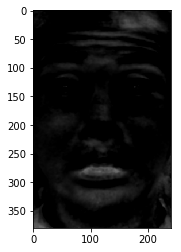

In [12]:
eigvectors = kEigvec(6)
for i in range(eigvectors.shape[1]):
    vec = eigvectors[:,i]
    display_face(np.dot(A.T, vec).reshape(380,240))

In [13]:
np.dot(A.T, kEigvec(6)).shape

(91200, 6)

Converting from array to PIL Image


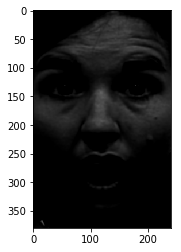

In [14]:
display_face(A[3,:].reshape(380, 240))

In [15]:
T = np.dot(A, np.dot(A.T, kEigvec(10)))

In [16]:
T.shape

(20, 10)

In [17]:
T = np.hstack((T, np.ones(T.shape[0]).reshape(-1, 1)))
T.shape

(20, 11)

In [147]:
(1/(1+np.exp(-np.dot(A, W))) > 0.5).shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


(80,)

In [216]:
t = np.array(['f' in x for x in labels])
t.shape

(20,)

In [259]:
def logistic(X, w):
    return 1/(1+np.exp(np.dot(X, w))) > 0.5
    
def batchGradientDescent(dat, pred, epoch=1000, alpha=0.01):
    # dat (nsamples, mfeatures)
    # pred (nsamples, 1)
    nsamp, nfeat = dat.shape
    Ws = []
    w = np.zeros(nfeat)
    for t in range(epoch):
        y = logistic(dat, w)
        delta = np.dot((t-y), dat)
        w = w - alpha * delta
        Ws.append(w)
    return w, Ws

In [260]:
w, Ws = batchGradientDescent(T, t)

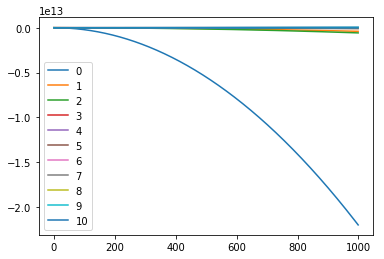

In [261]:
Ws = np.array(Ws)
for i in range(Ws.shape[1]):
    w_i = Ws[:, i]
    plt.plot(w_i, label=i)
plt.legend()

In [226]:
b = np.ones(a.shape[0])
b

array([1., 1.])

In [227]:
np.dot(b, a)

array([4., 6., 8.])